<a href="https://colab.research.google.com/github/V-Gopi-Kiran/Gopi-Kiran/blob/main/Predicting_rain_using_various_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the necessary modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

##Reading, organizing, and encoding the data

In [2]:
data = pd.read_csv('/content/weatherAUS.csv')
print('Size of weather data frame is :',data.shape)
data.info()
data[0:10]

Size of weather data frame is : (21900, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21900 non-null  object 
 1   Location       21900 non-null  object 
 2   MinTemp        21453 non-null  float64
 3   MaxTemp        21573 non-null  float64
 4   Rainfall       21398 non-null  float64
 5   Evaporation    7520 non-null   float64
 6   Sunshine       4876 non-null   float64
 7   WindGustDir    18216 non-null  object 
 8   WindGustSpeed  18218 non-null  float64
 9   WindDir9am     18919 non-null  object 
 10  WindDir3pm     20027 non-null  object 
 11  WindSpeed9am   21189 non-null  float64
 12  WindSpeed3pm   20510 non-null  float64
 13  Humidity9am    21408 non-null  float64
 14  Humidity3pm    20714 non-null  float64
 15  Pressure9am    18310 non-null  float64
 16  Pressure3pm    18314 non-null  float64
 17  Cloud9

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
data.count().sort_values()

Sunshine          4876
Evaporation       7520
Cloud3pm         11850
Cloud9am         12162
WindGustDir      18216
WindGustSpeed    18218
Pressure9am      18310
Pressure3pm      18314
WindDir9am       18919
WindDir3pm       20027
WindSpeed3pm     20510
Humidity3pm      20714
Temp3pm          20863
WindSpeed9am     21189
RainTomorrow     21398
RainToday        21398
Rainfall         21398
Humidity9am      21408
MinTemp          21453
Temp9am          21551
MaxTemp          21573
Location         21900
Date             21900
dtype: int64

In [4]:
data = data.drop(columns=['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date','Location'], axis=1)
data = data.dropna(how='any')
print(data.shape)

(16285, 17)


In [5]:
# Replace No and Yes for 0 and 1 in RainToday and RainTomorrow
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

# Categorical variables WindGustDir, WindDir3pm and WindDir9am in dummy variables for each category.
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(data, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(16285, 62)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


##Normalizing the data using MinMaxScaler()

In [6]:
standa = preprocessing.MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.506061,0.397531,0.002732,0.289062,0.211765,0.305556,0.694737,0.212121,0.457912,0.486159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.324242,0.451852,0.000000,0.289062,0.023529,0.277778,0.410526,0.242424,0.506734,0.498270,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.490909,0.466667,0.000000,0.304688,0.200000,0.333333,0.347368,0.292929,0.456229,0.513841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.378788,0.523457,0.000000,0.132812,0.105882,0.097222,0.421053,0.151515,0.624579,0.584775,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.630303,0.629630,0.004554,0.265625,0.058824,0.250000,0.810526,0.323232,0.510101,0.467128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Calculate the correlation matrix
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

# We extract variables with correlation less than 0.5%
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Var correlation < 0.5%                  RainTomorrow
Temp9am              0.003036
WindGustDir_NNE      0.000690
WindGustDir_NW       0.000207
WindGustDir_SE       0.003933
WindDir3pm_ESE       0.003720
WindDir3pm_NE        0.004932
WindDir3pm_SE        0.004480
WindDir9am_ENE       0.001629
WindDir9am_N         0.003244
WindDir9am_NW        0.000486
Data Final (16285, 52)


##Obtaining the data for training and testing

In [8]:
from sklearn.model_selection import train_test_split
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (13028, 51)
Y train shape:  (13028,)
X test shape:  (3257, 51)
Y test shape:  (3257,)


##1. Predicting using logistic regression 

In [9]:
from sklearn.linear_model import LogisticRegression

# defining the model
logreg = LogisticRegression(C=10)

# training the model
logreg.fit(X_train, Y_train)

# predicting target values
Y_predict1 = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


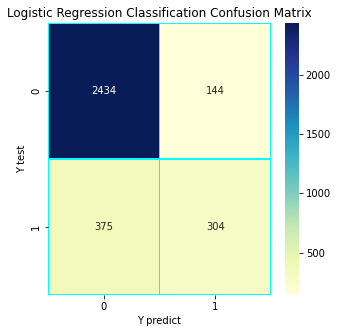

[1. 0. 0. ... 1. 1. 0.]


In [10]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

print(Y_predict1)

In [11]:
# Test score of logistic regression model
score_logreg = logreg.score(X_test, Y_test)
print("The test score of the logistic regression ML model is", score_logreg)

The test score of the logistic regression ML model is 0.8406509057414799


##2. Predicting using Naive bayes ML model

In [12]:
from sklearn.naive_bayes import GaussianNB

# defining the model
nbcla = GaussianNB()

# training model
nbcla.fit(X_train, Y_train)

# predicting target values
Y_predict3 = nbcla.predict(X_test)

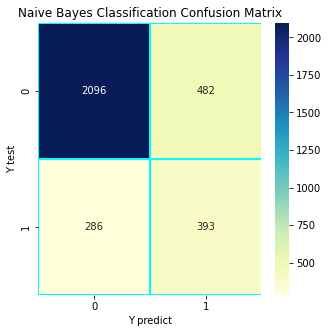

[1. 0. 0. ... 1. 1. 0.]


In [13]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
print(Y_predict3)

In [14]:
# Test score of Naive bayes ML model
score_nbcla = nbcla.score(X_test, Y_test)
print("The test score of the Naive bayes ML model is", score_nbcla)

The test score of the Naive bayes ML model is 0.764200184218606


##3. Predicting using Decision tree classification

In [15]:
from sklearn.tree import DecisionTreeClassifier

# defining the model
dtcla = DecisionTreeClassifier(random_state=9)

# training model
dtcla.fit(X_train, Y_train)

# predicting target values
Y_predict4 = dtcla.predict(X_test)

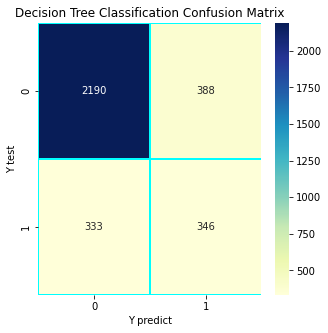

[1. 0. 1. ... 1. 0. 1.]


In [16]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
print(Y_predict4)

In [17]:
# Test score of the Decision tree model
score_dtcla = dtcla.score(X_test, Y_test)
print("The test score of the Decision tree model", score_dtcla)

The test score of the Decision tree model 0.7786306416948112


##4. Predicting using Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# defining the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# training model
rfcla.fit(X_train, Y_train)

# predicting target values
Y_predict5 = rfcla.predict(X_test)

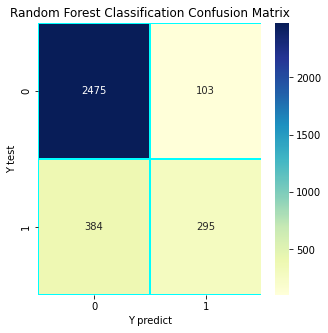

[1. 0. 0. ... 1. 1. 0.]


In [19]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
print(Y_predict5)

In [20]:
# Test score of the Random forest model
score_rfcla = rfcla.score(X_test, Y_test)
print("the test score of the Random forest model is", score_rfcla)

the test score of the Random forest model is 0.8504758980657047


##5. Predicting using KNN (K-Nearest Neighbor)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# defining the model
knncla = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# training model
knncla.fit(X_train, Y_train)

# predicting target values
Y_predict6 = knncla.predict(X_test)

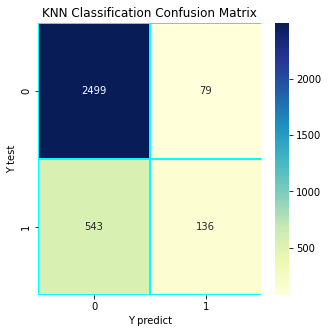

[0. 0. 0. ... 1. 0. 0.]


In [22]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
print(Y_predict6)

In [23]:
# Test score of the KNN model
score_knncla= knncla.score(X_test, Y_test)
print("The test score of the KNN model is", score_knncla)

The test score of the KNN model is 0.8090267116978815


##6. Predicting using SVM (Support Vector Machine)

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# defining the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), n_jobs=-1))

# training model
svmcla.fit(X_train, Y_train)

# predicting target values
Y_predict2 = svmcla.predict(X_test)

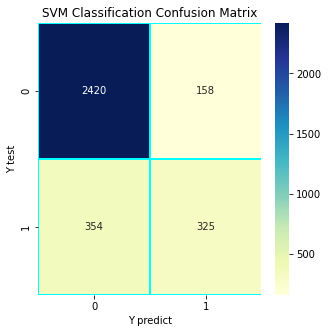

In [25]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [26]:
# Test score of the SVM model
score_svmcla = svmcla.score(X_test, Y_test)
print("The Test score of the SVM model", score_svmcla)

The Test score of the SVM model 0.842800122812404


## Comparing the accuracies of the different Machine Learning models

In [31]:
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla], index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score       0.840651
Support Vector Machine Score    0.842800
Naive Bayes Score               0.764200
Decision Tree Score             0.778631
Random Forest Score             0.850476
K-Nearest Neighbour Score       0.809027
dtype: float64


## Determining the best Machine Learning model 

In [30]:
list = [score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla]
list.sort()
print("The best achine Learning model is the Naive Bayes with an accuracy of ", list[0])

The best achine Learning model is the Naive Bayes with an accuracy of  0.764200184218606
